Importing Packages

In [1]:
import os, sys, math
import numpy as np
import pandas as pd
import matplotlib as mpl
from numpy import mean, std
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier

Reading Data

In [2]:
randomx=pd.read_csv("C:\\Users\\charan\\Desktop\\BioInformaticsProject\\output.csv")
yagain=pd.read_csv("C:\\Users\\charan\\Desktop\\BioInformaticsProject\\Input.csv", usecols=['Label'])

Training Support Vector Machine and Predicting From It

In [ ]:
clf = svm.SVC(probability=True,gamma='auto',kernel='rbf')
X_train, X_test, y_train, y_test = train_test_split( randomx, yagain, test_size=0.33, random_state=42, shuffle=1)
clf.fit(X_train,y_train.values.flatten())
y_pred= clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Starting 10-Fold Tests

In [7]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(clf, randomx, yagain.values.flatten(), scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f ' % (mean(scores)))

Accuracy: 0.930 


Printing Confusion Matrix

In [8]:
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

[[3457  570]
 [   3 4302]]
0.8830049261083743
0.9993031358885017
0.9375612945406995


For Roc Curve

0.9426654922478841


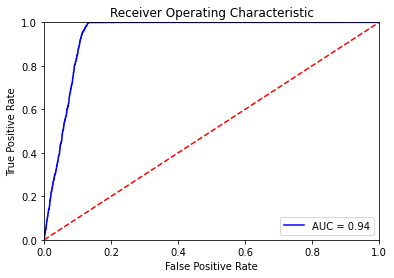

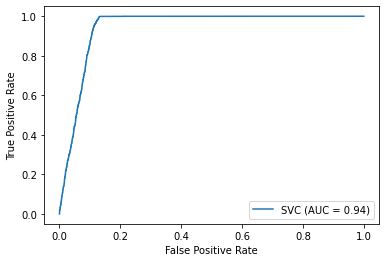

In [9]:
probs=clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()